In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import bipartite
import pandas as pd
import re

In [29]:
def degree(g, nodes=None, as_list=True):
    deg = dict(g.degree())
    if nodes: deg = dict(g.degree(nodes))
    
    if as_list: return list(deg.values())
    return deg

def degree_plot(g, nodes=None, title=''):
    deg = degree(g, nodes=nodes)
    bins = 100
    if len(nodes) < 100:
        bins = len(nodes)
    hist = np.histogram(deg, bins=bins)
    freqs, edges = hist[0], hist[1]
    n = freqs.size
    means = [(edges[i] + edges[i+1]) / 2 for i in range(n)]
    
    # SCATTER PLOT
    plt.plot(means, freqs, ".")
    plt.xlabel("k")
    plt.ylabel("frequency")
    plt.title("Degree distribution for %s" % title)
    plt.show()
    
    # LOG LOG PLOT
    plt.loglog(means, freqs, ".")
    plt.xlabel("log(k)")
    plt.ylabel("log(frequency)")
    plt.title("Log-log degree distribution for %s" % title)
    plt.show()

In [6]:
USER = 'user'
ELITE_USER = 'elite_user'
BIZ = 'biz'

In [7]:
biz = pd.read_csv('toronto/toronto_biz.csv')
user = pd.read_csv('toronto/toronto_users.csv')
reviews = pd.read_csv('toronto/toronto_reviews.csv')
elite_user = user[~user.elite.str.contains('None')]

In [8]:
print('#Reviews:', len(reviews))
print('#Users:', len(set(reviews.user_id)))
print('#Elite users:', len(elite_user))
print('#Businesses:', len(set(reviews.business_id)))

#Reviews: 379875
#Users: 84624
#Elite users: 7499
#Businesses: 9678


In [9]:
user.head()

,average_stars,elite,friends,name,review_count,useful,user_id,yelping_since
0,2.00,None,None,Susan,1,0,lzlZwIpuSWXEnNS91wxjHw,2015-09-28
1,1.00,None,None,Ying,1,0,bwPVGW1Mx0qmS_qNQ7xmYg,2012-02-09
2,3.50,None,None,Vai,4,0,JcKUiHAQ9cWGSO_qFbzlKw,2009-12-28
3,1.75,None,None,Walter,4,1,mNzy0-YVTJTP2jqHR7zWwQ,2014-05-31
4,2.00,None,None,K,3,0,AAxJbjcq94NaqUJGFE362g,2013-07-08


## Social Network (Friends)
### Make friend List

In [10]:
elite_ids = set(elite_user.user_id)

In [11]:
users_with_friends = user[user.friends != 'None']

In [12]:
friend_list = dict()
for row in users_with_friends.itertuples():
    friend_list[row.user_id] = re.findall(r'\w+', row.friends)

In [13]:
users_with_friends.iloc[0].user_id

'_a7BES74d_thQfpNBuk8Gw'

### Creating the social network

In [14]:
# A node class for storing data.
class Node:
    def __init__(self, Data, Type):
        self.Data = Data
        self.Type = Type
    
    def to_string(self):
        return "Node (%s), Data: " % (self.Type, self.Data)
    
    def __hash__(self):
        return hash(self.Data)
    def __eq__(self, other):
        return (
                self.__class__ == other.__class__ and 
                self.Data == other.Data
               )

In [16]:
social_network = nx.Graph()
for uid in users_with_friends.user_id:
    a = Node(uid, ELITE_USER if uid in elite_ids else USER)
    for fid in friend_list[uid]:
        b = Node(fid, ELITE_USER if fid in elite_ids else USER)
        social_network.add_edge(a, b)

#### Degree distributions

In [17]:
social_user_nodes = [n for n in list(social_network.nodes()) if n.Type == USER]
social_elite_user_nodes = [n for n in list(social_network.nodes()) if n.Type == ELITE_USER]

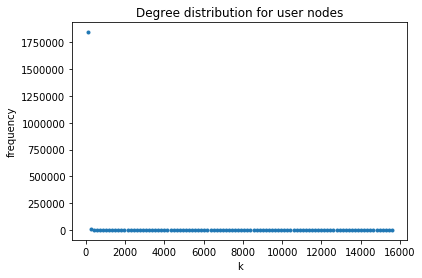

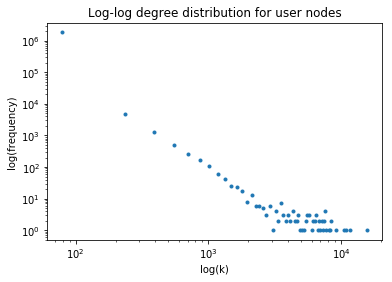

In [31]:
degree_plot(social_network, social_network.nodes(), "user nodes")

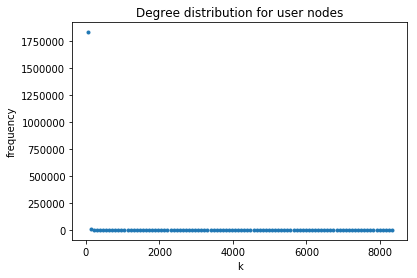

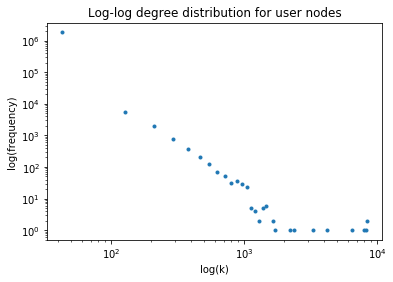

In [18]:
degree_plot(social_network, social_user_nodes, "user nodes")

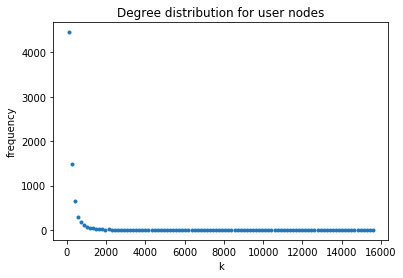

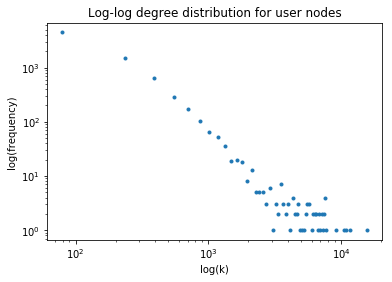

In [19]:
degree_plot(social_network, social_elite_user_nodes, "user nodes")

In [33]:
print('Nodes:', len(social_network.nodes()))
print('Edges:', len(social_network.edges()))

Nodes: 1852011
Edges: 4092577


In [34]:
L = max(nx.connected_component_subgraphs(social_network), key=len)
print("Nodes in largest subcomponent:", len(L.nodes()))
print("Edges in largest subcomponent:", len(L.edges()))

Nodes in largest subcomponent: 1842743
Edges in largest subcomponent: 4086081


In [35]:
nx.average_clustering(social_network)

0.041618381061566956

### Degree Dist

In [ ]:
biz_nodes = [n for n in list(G.nodes()) if n.Type == BIZ]
user_nodes = [n for n in list(G.nodes()) if n.Type == USER]
elite_user_nodes = [n for n in list(G.nodes()) if n.Type == ELITE_USER]

In [ ]:
degree_plot(G, user_nodes, "user nodes")

In [ ]:
degree_plot(G, elite_user_nodes, "elite user nodes")

### Largest subcomponent

In [ ]:
L = max(nx.connected_component_subgraphs(G), key=len)
print("Nodes in largest subcomponent:", len(L.nodes()))
print("Edges in largest subcomponent:", len(L.edges()))

The graph is connected, and therefore the largest subcomponent is the graph itself.

### Eigenvector Centrality

In [ ]:
ev_centrality = nx.eigenvector_centrality_numpy(G)
sorted_ev_centrality = sorted(ev_centrality.items(), key=lambda x: x[1], reverse=True)
ev_elite_user = [(x,y) for (x,y) in sorted_ev_centrality if x.Type == ELITE_USER]

### Degree Centrality

### Removing elite users

In [ ]:
n = 20
number_elite_nodes = np.zeros(n)
number_elite_edges = np.zeros(n)

In [ ]:
G1 = G.copy()

In [ ]:
deg_centrality = nx.degree_centrality(G1)
sorted_deg_centrality = sorted(deg_centrality.items(), key=lambda x: x[1], reverse=True)
elite_user_by_degree = [x for (x,y) in sorted_deg_centrality if x.Type == ELITE_USER]

In [ ]:
one_percent = round(len(elite_user_by_degree) / 100)

In [ ]:
for i in range(n):
    print("Start of round %i..." % (i+1))
    start, end = i * one_percent, (i+1) * one_percent
    nodes_to_remove = elite_user_by_degree[start:end]
    G1.remove_nodes_from(nodes_to_remove)
    subgraph = max(nx.connected_component_subgraphs(G1), key=len)
    number_elite_nodes[i] = len(subgraph.nodes())
    number_elite_edges[i] = len(subgraph.edges())

In [ ]:
nx.shortest_path_length(G)

In [ ]:
number_elite_nodes

In [ ]:
number_elite_edges

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(range(1, 21), number_elite_nodes)
plt.ylim([0,25000])

In [ ]:
G = nx.Graph()
for row in reviews.itertuples():
    b = Node(row.business_id, BIZ)
    u = Node(row.user_id, ELITE_USER if row.user_id in elite_ids else USER)
    G.add_edge(u, b)

In [ ]:
G = nx.Graph()
for row in reviews.itertuples():
    b = Node(row.business_id, BIZ)
    u = Node(row.user_id, ELITE_USER if row.user_id in elite_ids else USER)
    G.add_edge(u, b)